In [2]:
import pandas as pd  # type: ignore
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns 

In [28]:
# Load the dataset

data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Meta Scifor Technology\heart.csv")

# Display the first few rows of the dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [12]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
# Define feature variables (X) and target variable (y)
X = data.drop("target", axis=1)  # Assuming 'target' is the column to predict
y = data["target"]

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Evaluate accuracy and display confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 80.52%
Confusion Matrix:
 [[119  40]
 [ 20 129]]


In [18]:
# Calculate ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.90


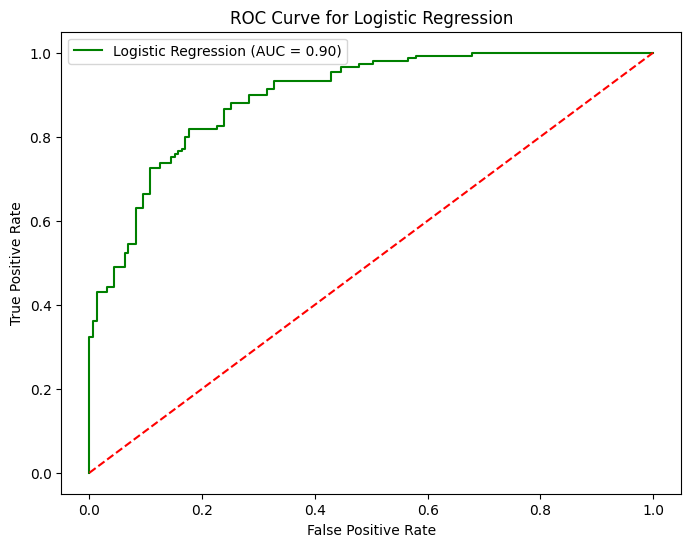

In [37]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

In [21]:
# Selecting two features for visualization (e.g., age and cholesterol)
X_viz = data[["age", "restecg"]].values
y_viz = data["target"]

In [22]:
# Splitting and scaling the two-feature data
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(X_viz, y_viz, test_size=0.3, random_state=42)
X_train_viz = scaler.fit_transform(X_train_viz)
X_test_viz = scaler.transform(X_test_viz)

In [23]:
# Train a new logistic regression model on this subset
model_viz = LogisticRegression()
model_viz.fit(X_train_viz, y_train_viz)


LogisticRegression()

In [24]:
# Plotting decision boundary
plt.figure(figsize=(10, 8))
x_min, x_max = X_train_viz[:, 0].min() - 1, X_train_viz[:, 0].max() + 1
y_min, y_max = X_train_viz[:, 1].min() - 1, X_train_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<Figure size 1000x800 with 0 Axes>

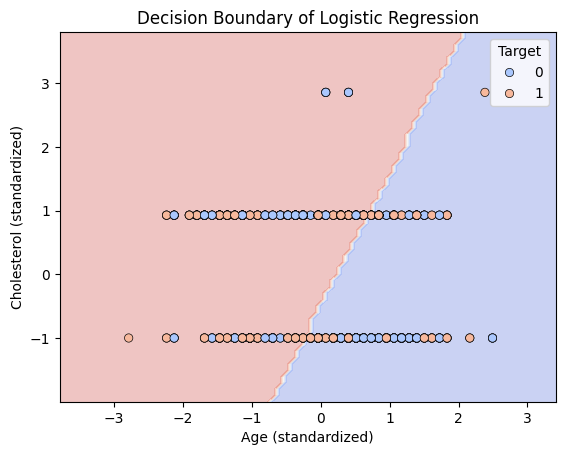

In [25]:
# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_train_viz[:, 0], y=X_train_viz[:, 1], hue=y_train_viz, palette='coolwarm', edgecolor="k")
plt.xlabel("Age (standardized)")
plt.ylabel("Cholesterol (standardized)")
plt.title("Decision Boundary of Logistic Regression")
plt.legend(title="Target")
plt.show()